# Preparation

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import tikzplotlib
import sys
sys.path += ["/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/"]
sys.path

['/Users/yousuf/Workspace/dissertation/code',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python37.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/yousuf/Library/Python/3.7/lib/python/site-packages',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Python/3.7/site-packages',
 '/Users/yousuf/Library/Python/3.7/lib/python/site-packages/IPython/extensions',
 '/Users/yousuf/.ipython',
 '/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/']

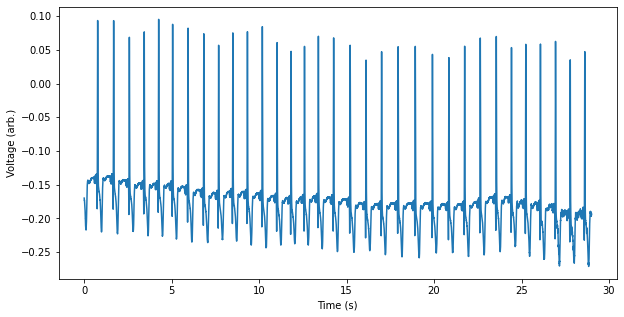

In [69]:
import hr_eval
import numpy as np
import tikzplotlib as tikz
prep = "/Users/yousuf/Workspace/dissertation/report/preparation/"
examples_path = "/Users/yousuf/Workspace/dissertation/code/examples/"  
ecg_path = examples_path + "2_stat_1.edf"
ecg, sf= hr_eval.get_ecg_signal(ecg_path)
start = 20000
ecg = ecg[start:]
fig, ax = plt.subplots(figsize=(10,5))
time = np.arange(len(ecg))/sf
ax.plot(time, ecg)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (arb.)")

tikz.save(prep+"ecg.tex")

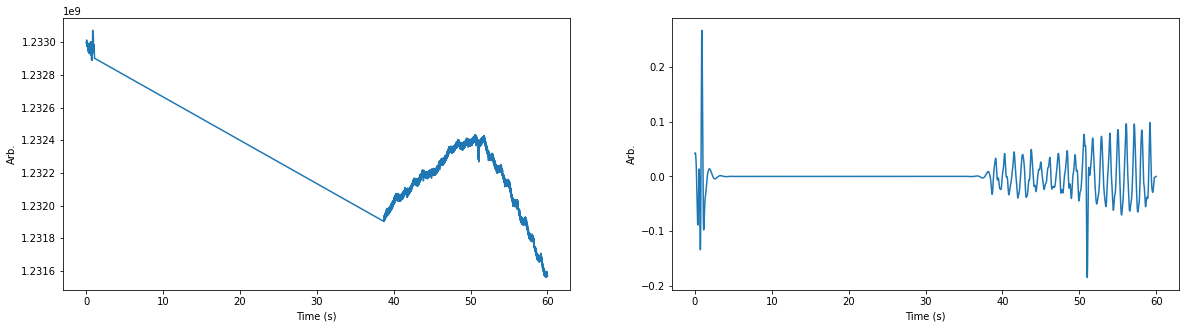

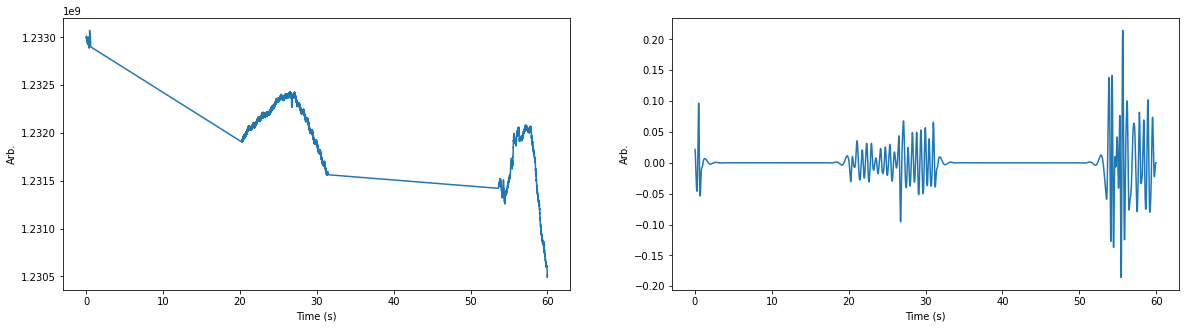

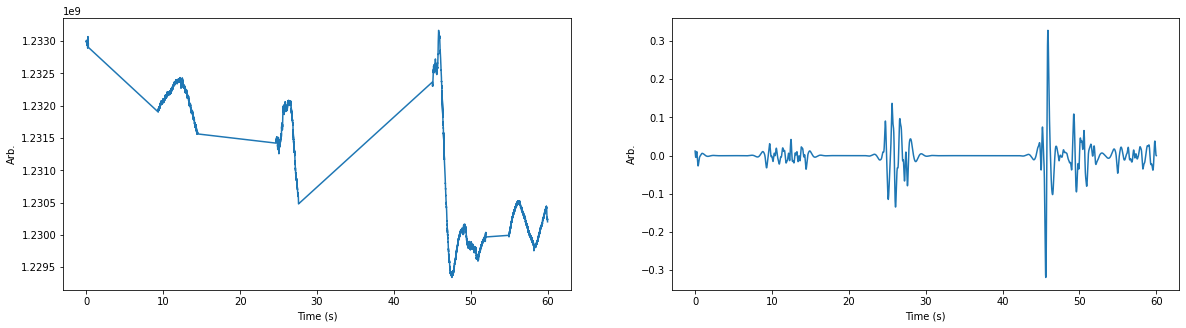

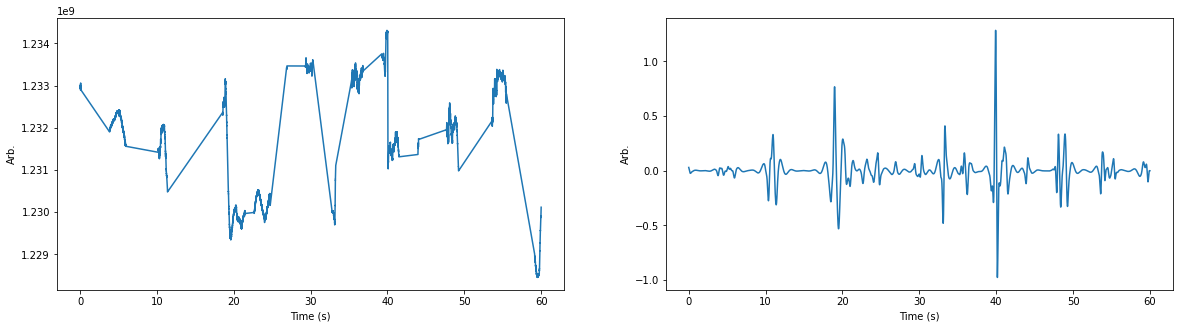

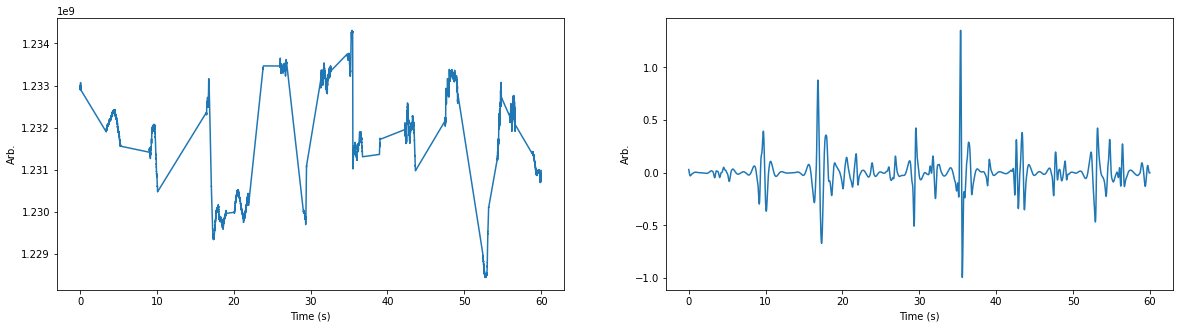

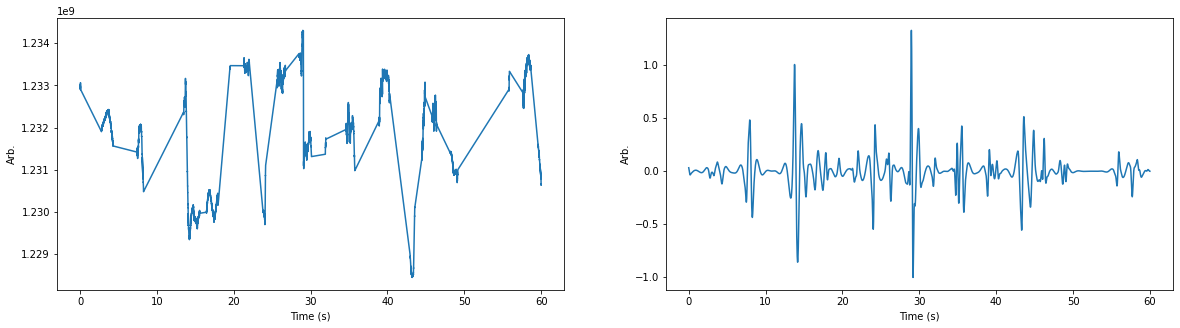

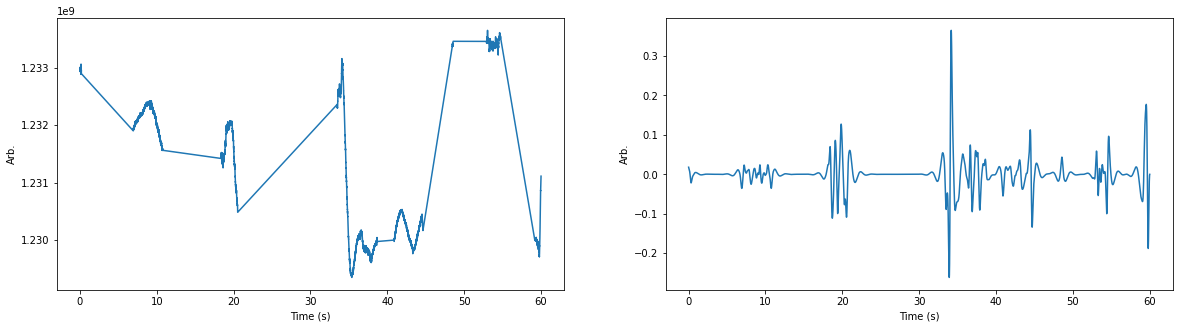

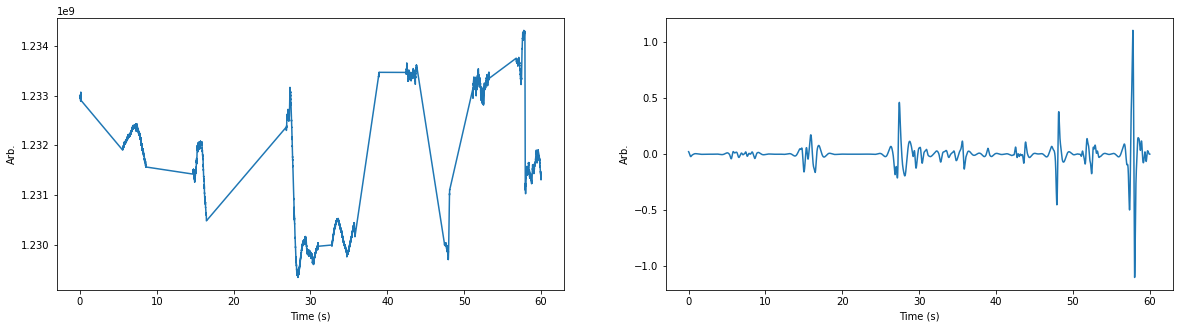

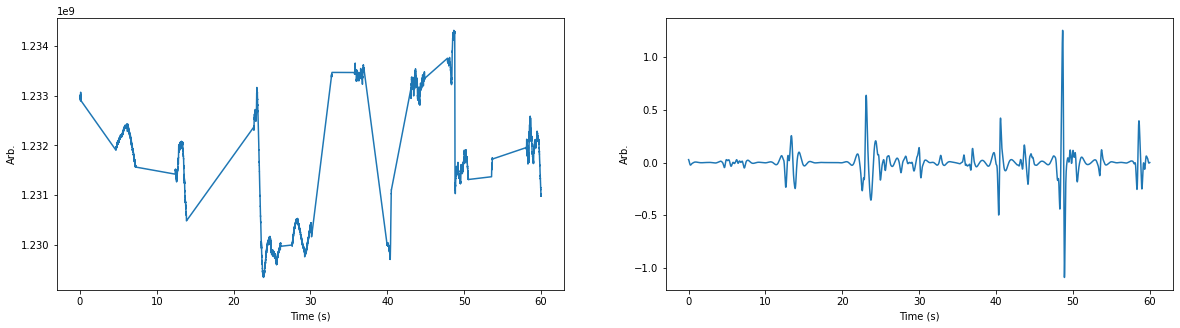

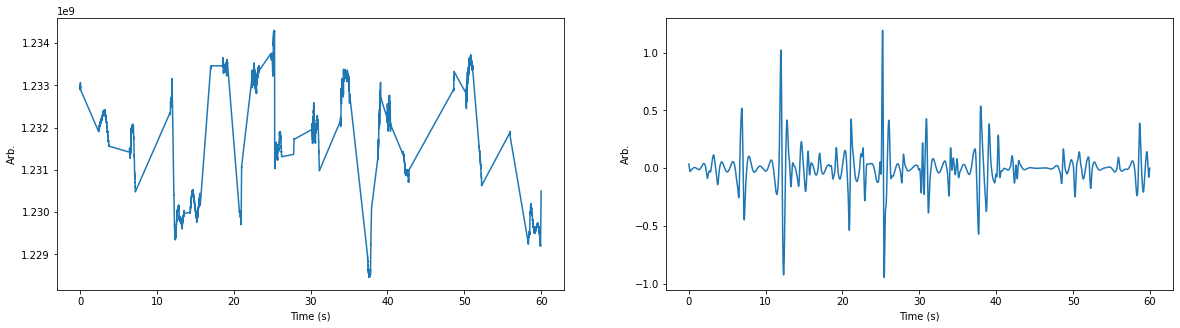

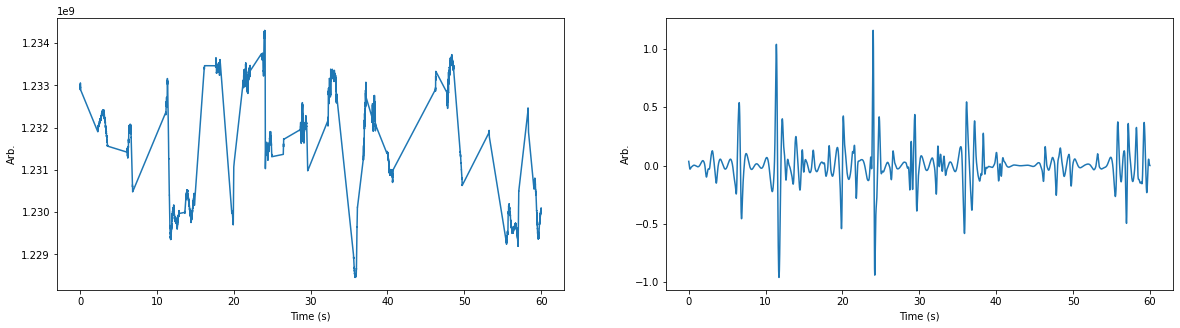

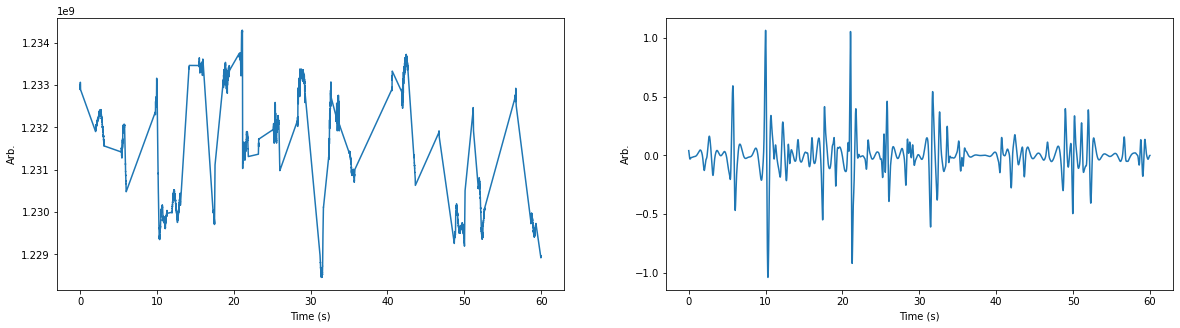

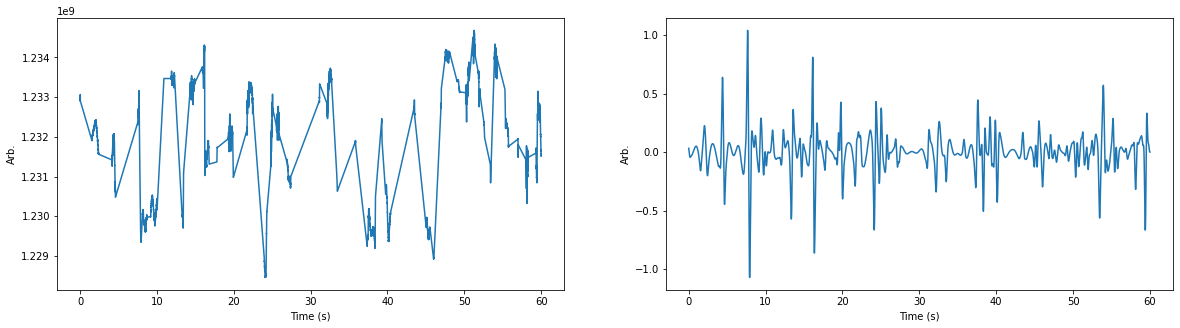

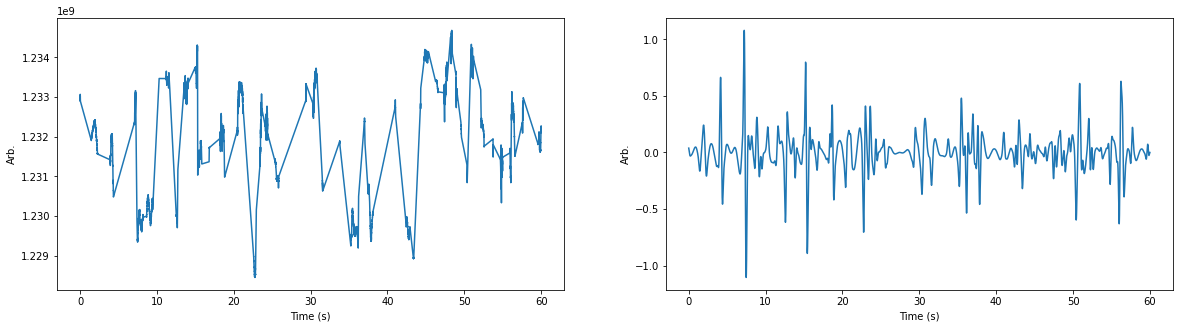

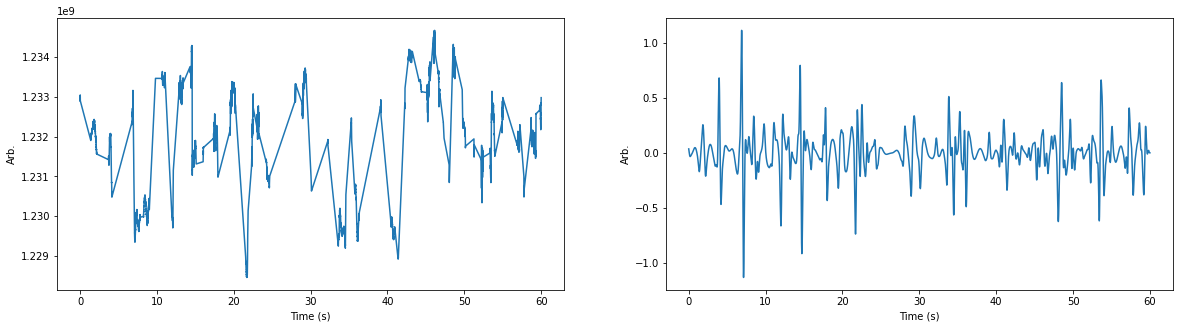

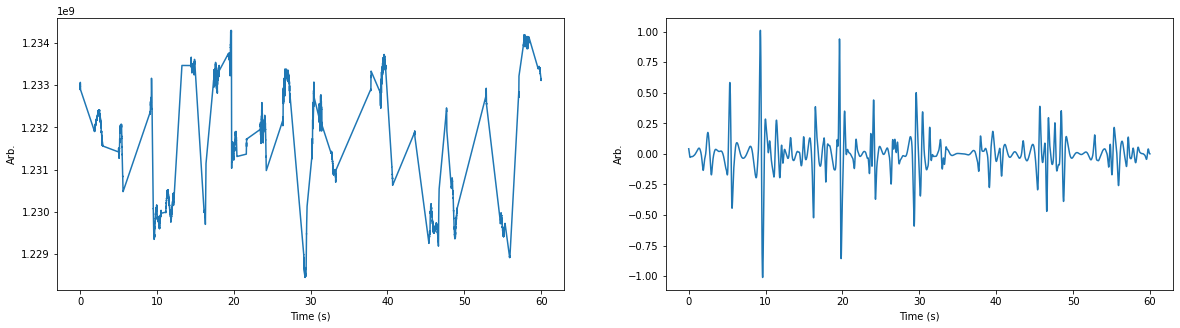

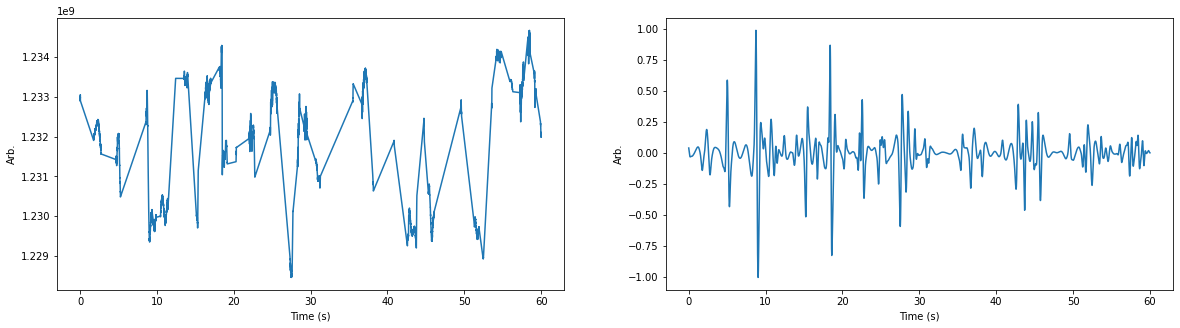

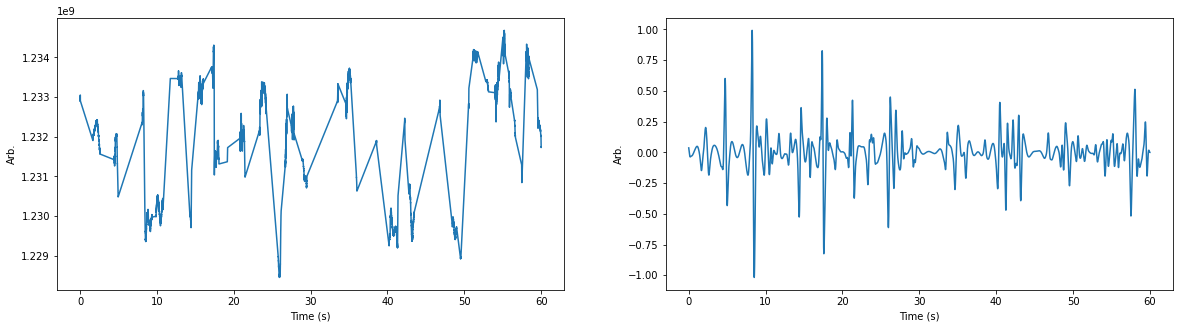

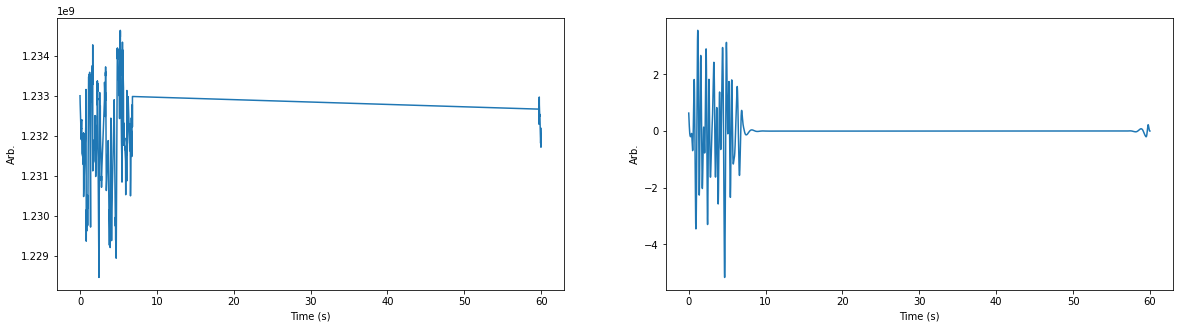

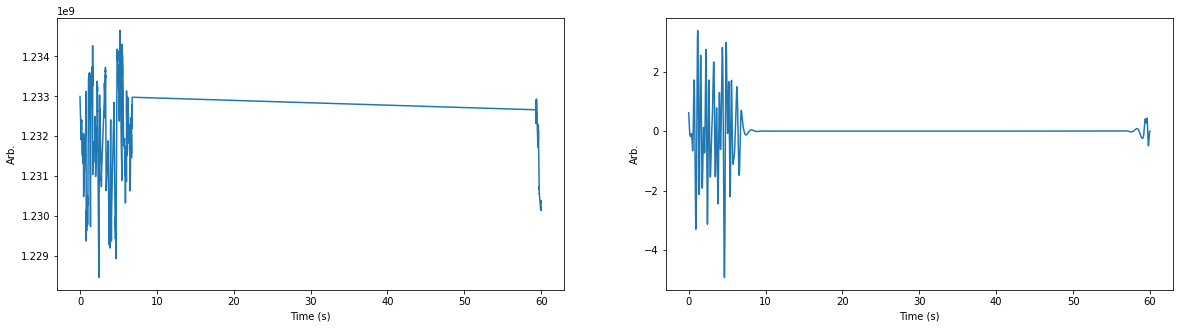

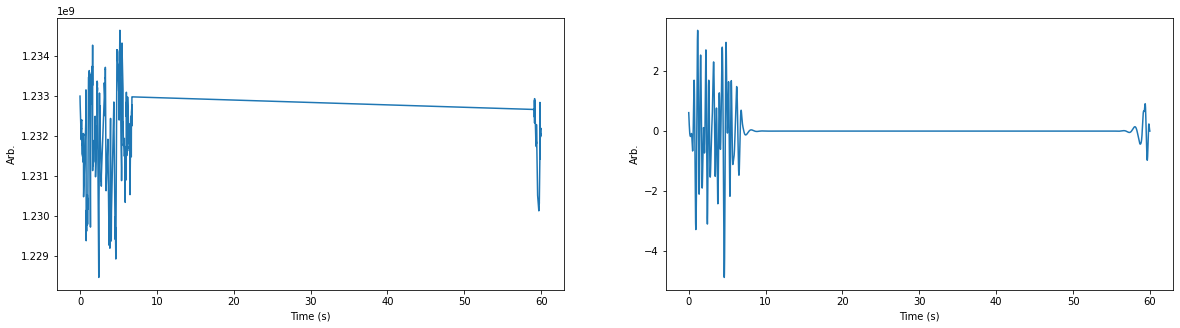

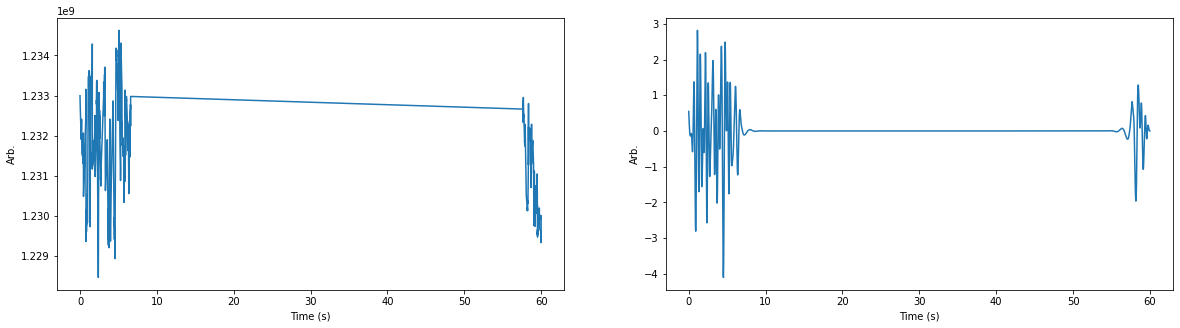

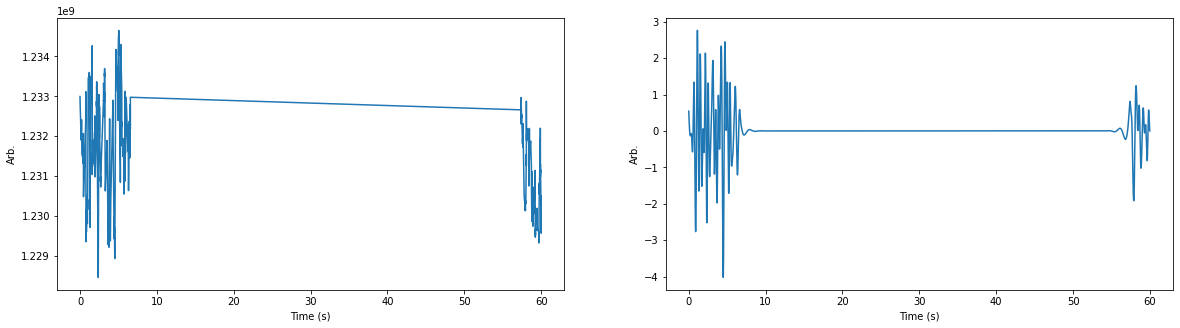

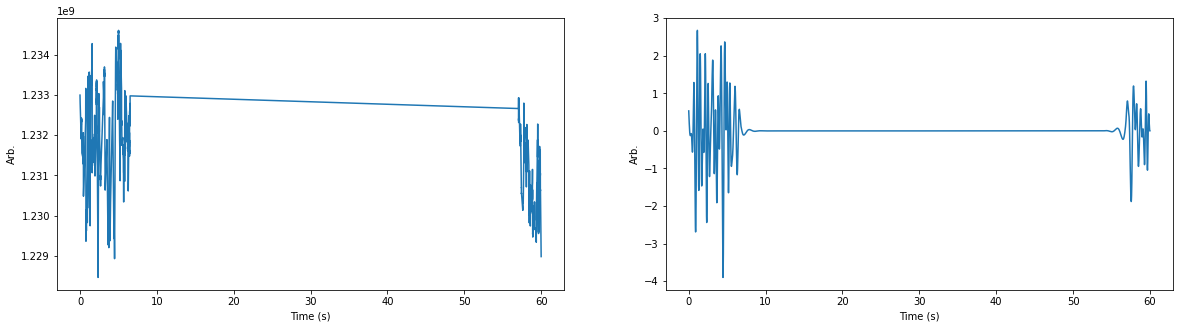

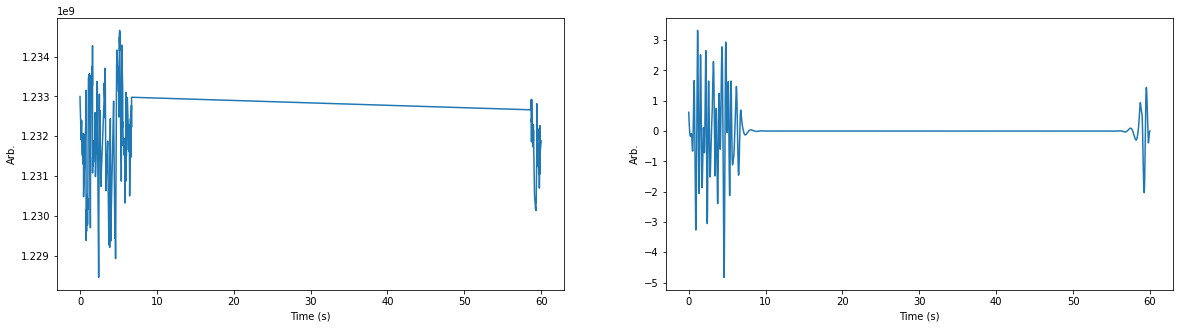

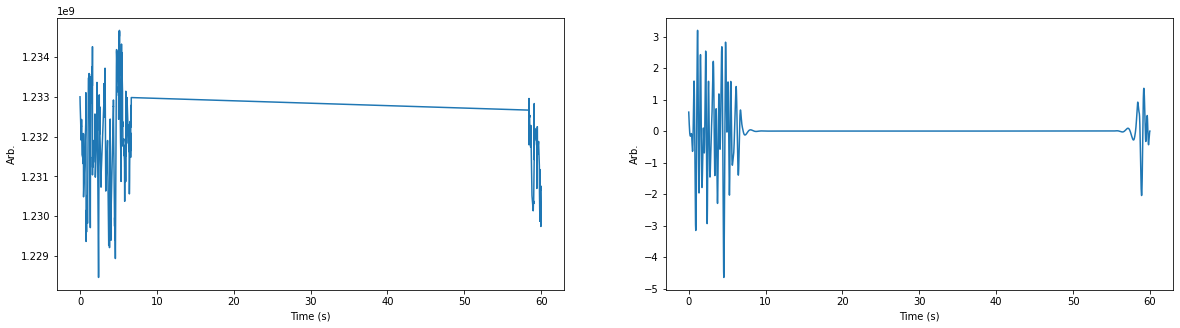

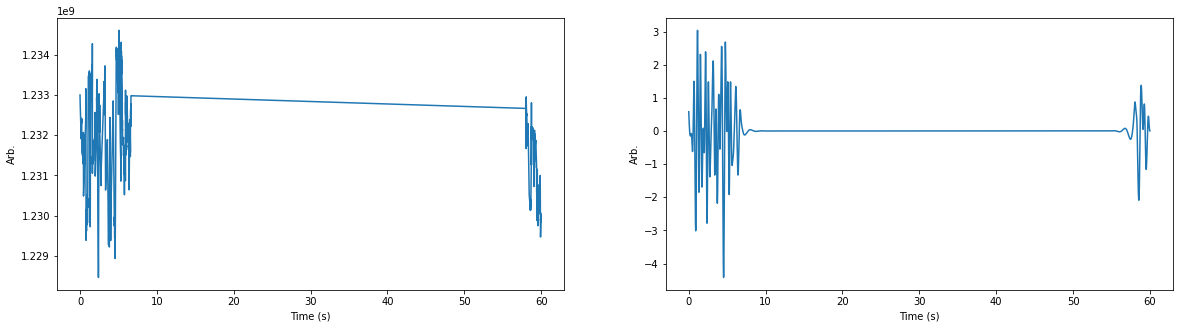

In [95]:
import heartpy as hp
for i in [1, 1.5, 2]:
    for j in ["stat", "jog", "star"]:
        for k in [1,2,3]:
            ppg_path = examples_path + f"{i}_{j}_{k}.csv"
            ppg = hr_eval.add_time_to_ppg(hr_eval.get_ppg_signal(ppg_path))
            low, high = 0,60
            index = (ppg["Time"] > low) & (ppg["Time"] < high)
            ppg = ppg[index]
            fig, ax = plt.subplots(ncols=2, figsize=(20,5))
            x = np.arange(low, high, 1/1000)
            y = np.interp(x, ppg["Time"], ppg["PPG"])

            #ax[0].plot(ppg["Time"], ppg["PPG"],label="Raw")
            ax[0].plot(x,y)
            ax[0].set_xlabel("Time (s)")
            ax[0].set_ylabel("Arb.")
            y = (y-np.mean(y))/np.std(y)
            sig = (ppg["PPG"]-np.mean(ppg["PPG"]))/np.std(ppg["PPG"])
            y = hp.filter_signal(y, [0.7, 3.5], sample_rate=1000, 
                                    order=3, filtertype='bandpass')
            ax[1].plot(x, y)
            ax[1].set_ylabel("Arb.")
            ax[1].set_xlabel("Time (s)")
# ax.plot(ppg["Time"], sig)
tikz.save(prep+"ppg.tex")

[ 710 1160 1520 2198 2527 3145 3500 3839 4271 4698 5027 5355]
102.85714285714286


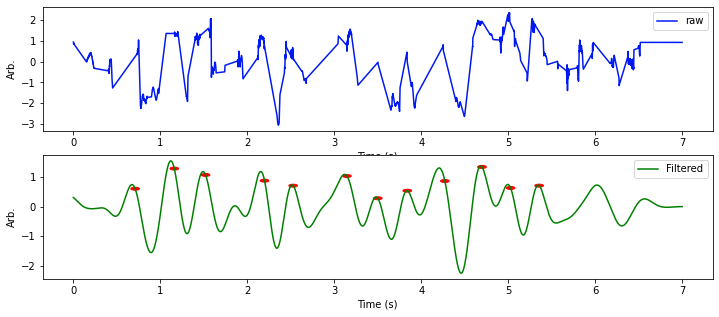

In [146]:
import biosppy
import matplotlib.cm as cm
ppg_path = examples_path + f"2_jog_3.csv"
ppg = hr_eval.add_time_to_ppg(hr_eval.get_ppg_signal(ppg_path))
low, high = 0,7
index = (ppg["Time"] > low) & (ppg["Time"] < high)
ppg = ppg[index]
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,5))
x = np.arange(low, high, 1/1000)
y = np.interp(x, ppg["Time"], ppg["PPG"])
cmap = cm.get_cmap('winter')
y = (y-np.mean(y))/np.std(y)
#ax[0].plot(ppg["Time"], ppg["PPG"],label="Raw")
ax[0].plot(x,y, label="raw", color=cmap(0.1))
ax[0].legend()
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Arb.")
y = (y-np.mean(y))/np.std(y)
sig = (ppg["PPG"]-np.mean(ppg["PPG"]))/np.std(ppg["PPG"])
y = hp.filter_signal(y, [0.7, 3.5], sample_rate=1000, 
                        order=3, filtertype='bandpass')
rpeaks = biosppy.signals.ecg.engzee_segmenter(y)[0]
# ppg_hr.append(mean_heart_rate(signal, ppg_sf))
print(rpeaks)
avg_hr = 60*len(rpeaks)/(high - low)
print(avg_hr)
circles = ppg.iloc[rpeaks]
times = x[rpeaks]
points = y[rpeaks]
for i in range(len(times)):
    ax[1].add_artist(plt.Circle((times[i], points[i]),.05, color="r", label="heart beat"))
# a_circle = plt.Circle((circles["Time"], ), .5)

ax[1].plot(x, y, label="Filtered", color="g")
ax[1].set_ylabel("Arb.")
ax[1].set_xlabel("Time (s)")
ax[1].legend()
ax[1].plot()
# ax.plot(ppg["Time"], sig)
tikz.clean_figure()
tikz.save(prep+"wear_ppg.tex", axis_width='10cm', axis_height='10cm', textsize=8)


In [ ]:
haar_detector()

# Implementation

In [4]:
import cv2 as cv
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
def haar_detector(image):
  cropped_images = []
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.05,
    minNeighbors=5,
    minSize=(1,1),
    flags = cv.CASCADE_SCALE_IMAGE
  )
  return faces

def _draw_rectangle(image, faces):
    for (x, y, w, h) in faces:
        x,y,w,h = int(x),int(y),int(w),int(h)
        cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

In [10]:
print(yc[:,:,1])

[[128 128 128 ... 131 131 131]
 [128 128 128 ... 131 131 131]
 [128 128 128 ... 131 131 131]
 ...
 [129 129 129 ... 127 127 127]
 [129 129 129 ... 127 127 127]
 [129 129 129 ... 127 127 127]]


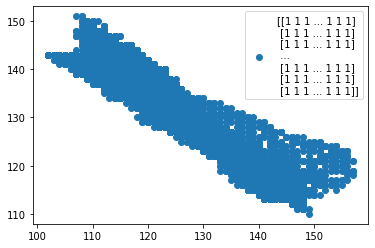

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
cmap = cm.get_cmap('jet')
for ti in helper.get_test_images()[:1]:
    yc = cv.cvtColor(ti, cv.COLOR_BGR2YCrCb)
    rksd = RepeatedKMeansSkinDetector()
    labels,mean = rksd.detect(ti)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(yc[:,:,1], yc[:,:,2], label=labels)#, color=cmap(labels))
    ax.legend()

In [2]:
import sys
sys.path += ["/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/"]
from face_det import DNNDetector
from region_selection import IntervalSkinDetector, RepeatedKMeansSkinDetector, BayesianSkinDetector
import helper
for test_image in helper.get_test_images():

    (x,y,w,h) = DNNDetector().detect_face(test_image)[0]
    cropped = test_image[y:y+h, x:x+w]

    faces = haar_detector(test_image)
    helper.show_images_plt([_draw_rectangle(test_image.copy(), faces), _draw_rectangle(test_image.copy(), DNNDetector().detect_face(test_image))])
    isd, rksd, bsd = IntervalSkinDetector(), RepeatedKMeansSkinDetector(), BayesianSkinDetector()
    masks = [isd.detect(cropped)[0], rksd.detect(cropped)[0], rksd.detect(cropped, 3)[0], rksd.detect(cropped, 4)[0]]
    masks = [255*i for i in masks]
    helper.show_images_plt(masks)
    helper.display_heatmap([bsd.detect(cropped)[0]])


NameError: name 'haar_detector' is not defined